In [138]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplot
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
df_sp_italiano = pd.read_csv("Base-de-dados-tratado/tomates-precos-sp-italiano-AA.csv")
df_sp_italiano.head()

,Unnamed: 0,Produto,Região,Dia,Mês,Ano,Unidade,Preço,Data,Aumento,Aceleracao
0,27352,Italiano - atacado,São Paulo (capital),2,1,2015,Caixa 20 kg,32.00,2015-01-02,NaN,NaN
1,27353,Italiano - atacado,São Paulo (capital),5,1,2015,Caixa 20 kg,40.00,2015-01-05,8.00,NaN
2,27354,Italiano - atacado,São Paulo (capital),6,1,2015,Caixa 20 kg,42.00,2015-01-06,2.00,-6.00
3,27355,Italiano - atacado,São Paulo (capital),7,1,2015,Caixa 20 kg,62.00,2015-01-07,20.00,18.00
4,27356,Italiano - atacado,São Paulo (capital),8,1,2015,Caixa 20 kg,50.63,2015-01-08,-11.37,-31.37


<Axes: xlabel='Data', ylabel='Preço'>

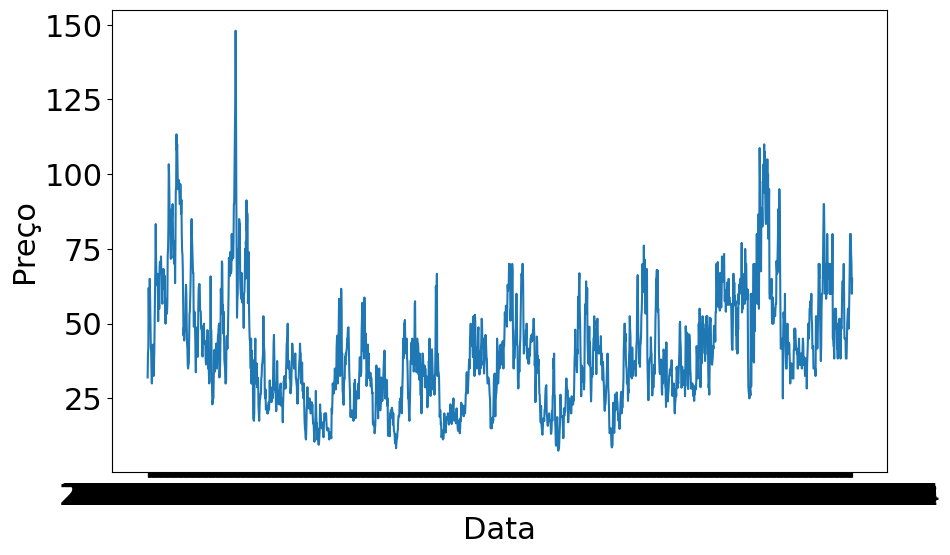

In [7]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 22
sns.lineplot(x='Data', y="Preço",data=df_sp_italiano)

In [8]:
sc = StandardScaler()

df_sp_italiano_to_scale = df_sp_italiano[['Data','Preço']]
df_sp_italiano_to_scale['Data'] = pd.to_datetime(df_sp_italiano_to_scale['Data'])
df_sp_italiano_to_scale['Data'] = pd.to_numeric(df_sp_italiano_to_scale['Data'])

sc.fit(df_sp_italiano_to_scale)

<ipython-input-8-8e80cd6b0cd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp_italiano_to_scale['Data'] = pd.to_datetime(df_sp_italiano_to_scale['Data'])
<ipython-input-8-8e80cd6b0cd6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp_italiano_to_scale['Data'] = pd.to_numeric(df_sp_italiano_to_scale['Data'])


StandardScaler()

In [9]:
dado_escalado = sc.transform(df_sp_italiano_to_scale)

In [10]:
x = dado_escalado[:,0]
y=dado_escalado[:,1]

Text(0.5, 0, 'Data')

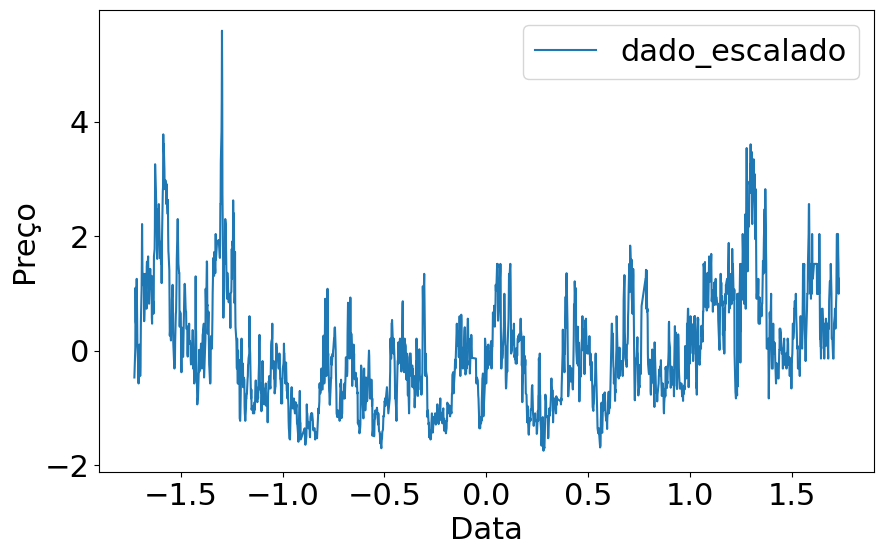

In [11]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
pyplot.ylabel('Preço')
pyplot.xlabel('Data')

In [12]:
tamanho_treino = int(len(df_sp_italiano_to_scale)*0.9)
tamano_teste = len(df_sp_italiano_to_scale) - tamanho_treino

In [13]:
x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

In [14]:
x_teste = x[tamanho_treino:len(df_sp_italiano_to_scale)]
y_teste = y[tamanho_treino:len(df_sp_italiano_to_scale)]

<Axes: >

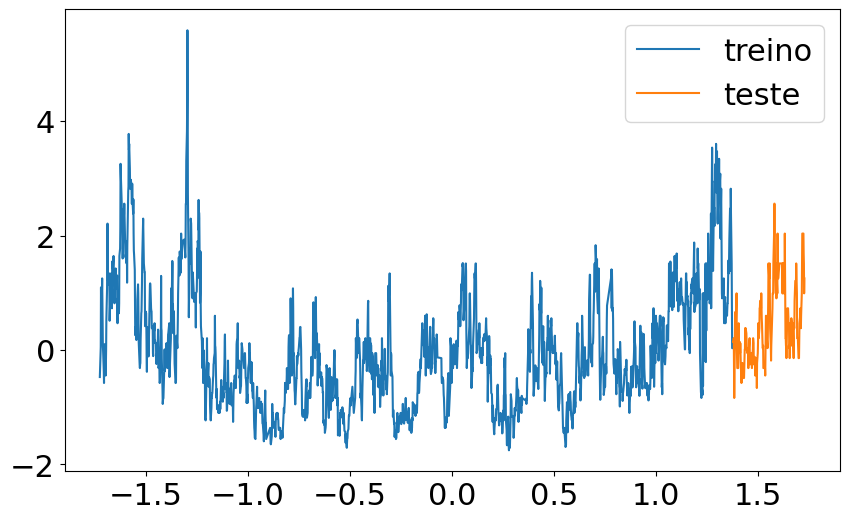

In [15]:
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_teste,y=y_teste,label='teste')

In [16]:
regressor = Sequential()

In [17]:
regressor.add(Dense(1, input_dim=1,kernel_initializer="Ones",
                    activation="linear",use_bias=False))

In [18]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [20]:
regressor.fit(x_treino,y_treino)

57/57 [==============================] - 1s 2ms/step - loss: 1.7865


In [21]:
y_predict= regressor.predict(x_treino)

57/57 [==============================] - 0s 1ms/step


<Axes: >

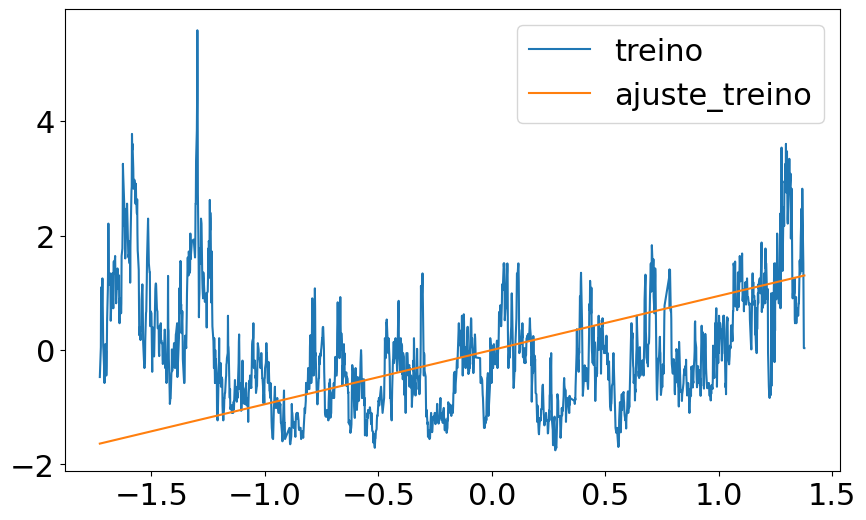

In [22]:
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_treino,y=y_predict[:,0],label='ajuste_treino')

In [23]:
d = {'tempo': x_treino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [24]:
resultado_transf = sc.inverse_transform(resultados)

In [25]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['Data','Preço']

<Axes: xlabel='Data', ylabel='Preço'>

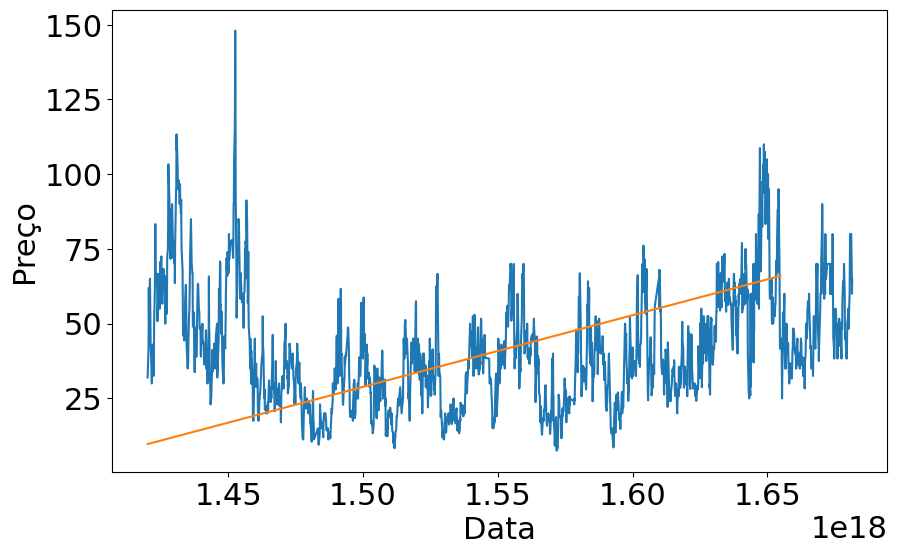

In [26]:
sns.lineplot(x="Data",y="Preço",data=df_sp_italiano_to_scale)
sns.lineplot(x="Data",y="Preço",data=resultado_transf)

In [27]:
y_predict_teste= regressor.predict(x_teste)

7/7 [==============================] - 0s 2ms/step


In [28]:
d = {'Data': x_teste, 'Preço': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [29]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [30]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['Data','Preço']

<Axes: xlabel='Data', ylabel='Preço'>

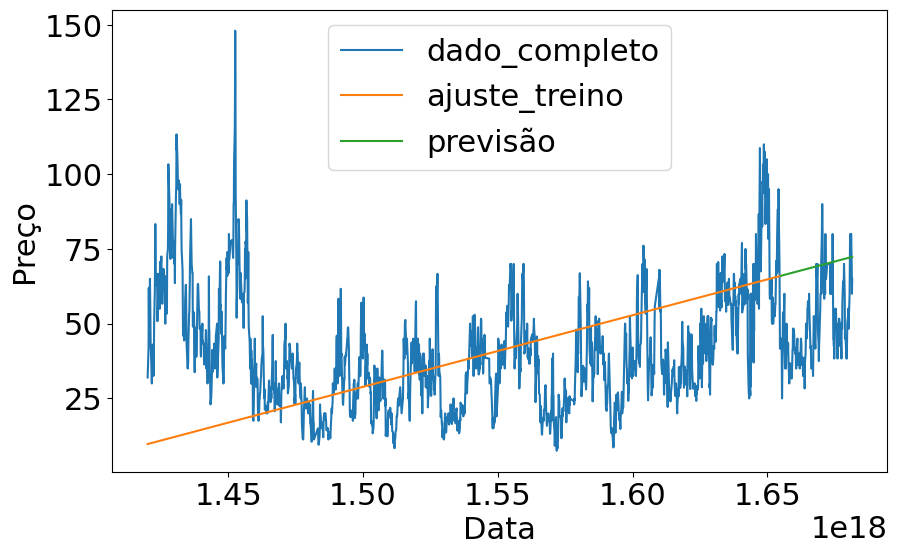

In [31]:
sns.lineplot(x="Data",y="Preço",data=df_sp_italiano_to_scale,label='dado_completo')
sns.lineplot(x="Data",y="Preço",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="Data",y="Preço",data=resultado_transf_teste,label='previsão')

In [32]:
regressor2 = Sequential()

In [33]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, input_dim=1, kernel_initializer='random_uniform',activation='linear',use_bias=False))

In [34]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [35]:
regressor2.fit(x_treino,y_treino,epochs =500)

Epoch 1/500
57/57 [==============================] - 1s 2ms/step - loss: 1.0380
Epoch 2/500
57/57 [==============================] - 0s 1ms/step - loss: 1.0361
Epoch 3/500
57/57 [==============================] - 0s 1ms/step - loss: 1.0366
Epoch 4/500
57/57 [==============================] - 0s 1ms/step - loss: 1.0365
Epoch 5/500
57/57 [==============================] - 0s 2ms/step - loss: 1.0364
Epoch 6/500
57/57 [==============================] - 0s 1ms/step - loss: 1.0367
Epoch 7/500
57/57 [==============================] - 0s 2ms/step - loss: 1.0367
Epoch 8/500
57/57 [==============================] - 0s 2ms/step - loss: 1.0373
Epoch 9/500
57/57 [==============================] - 0s 2ms/step - loss: 1.0364
Epoch 10/500
57/57 [==============================] - 0s 2ms/step - loss: 1.0365
Epoch 11/500
57/57 [==============================] - 0s 2ms/step - loss: 1.0362
Epoch 12/500
57/57 [==============================] - 0s 2ms/step - loss: 1.0363
Epoch 13/500
57/57 [=================

In [36]:
y_predict = regressor2.predict(x_treino)

57/57 [==============================] - 0s 1ms/step


In [37]:
y_predict_teste= regressor2.predict(x_teste)

7/7 [==============================] - 0s 2ms/step


<Axes: >

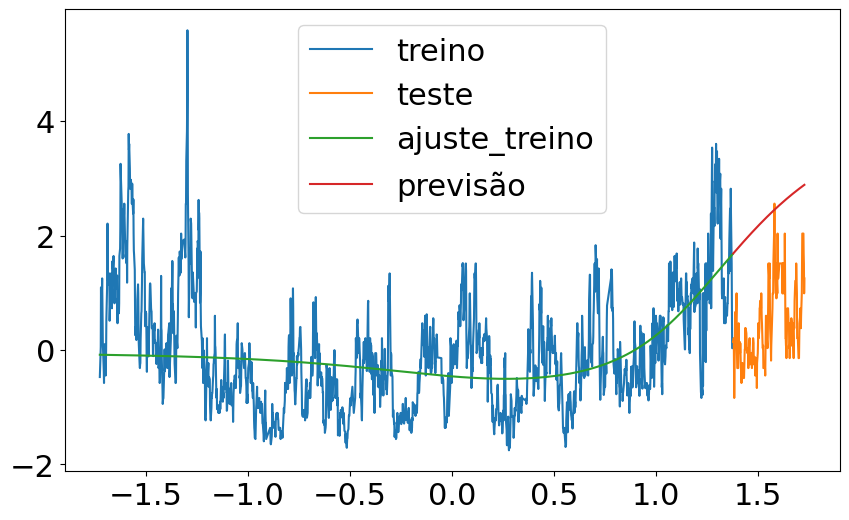

In [38]:
sns.lineplot(x=x_treino,y=y_treino,label='treino')
sns.lineplot(x=x_teste,y=y_teste,label='teste')
sns.lineplot(x=x_treino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=x_teste,y=y_predict_teste[:,0],label='previsão')

In [39]:
vetor = pd.DataFrame(y_treino)[0]

In [40]:
def separa_dados(vetor, n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [41]:
x_treino_novo, y_treino_novo = separa_dados(vetor,1)

In [42]:
vetor2 = pd.DataFrame(y_teste)[0]
x_teste_novo, y_teste_novo = separa_dados(vetor2,1)

In [43]:
regressor3 = Sequential()

In [44]:
regressor3.add(Dense(8, input_dim=1,kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dense_6 (Dense)             (None, 1)                 64        
                                                                 
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [45]:
regressor3.fit(x_treino_novo,y_treino_novo,epochs =50)

Epoch 1/50
57/57 [==============================] - 1s 2ms/step - loss: 0.8663
Epoch 2/50
57/57 [==============================] - 0s 2ms/step - loss: 0.3219
Epoch 3/50
57/57 [==============================] - 0s 1ms/step - loss: 0.1433
Epoch 4/50
57/57 [==============================] - 0s 1ms/step - loss: 0.1405
Epoch 5/50
57/57 [==============================] - 0s 1ms/step - loss: 0.1384
Epoch 6/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1364
Epoch 7/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1352
Epoch 8/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1338
Epoch 9/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1325
Epoch 10/50
57/57 [==============================] - 0s 2ms/step - loss: 0.1313
Epoch 11/50
57/57 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 12/50
57/57 [==============================] - 0s 1ms/step - loss: 0.1304
Epoch 13/50
57/57 [==============================

In [46]:
y_predict_novo = regressor3.predict(x_treino_novo)

57/57 [==============================] - 0s 1ms/step


<Axes: xlabel='Data', ylabel='0'>

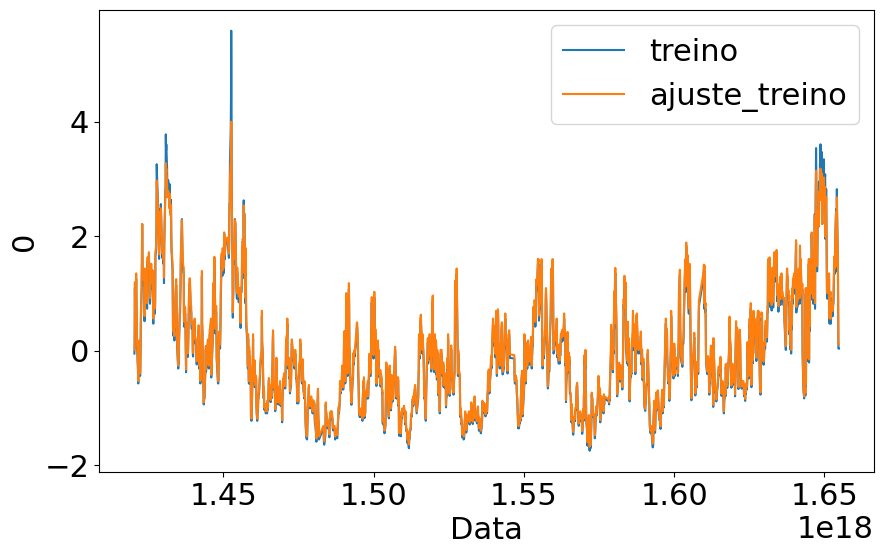

In [47]:
sns.lineplot(x='Data',y=y_treino_novo,data=df_sp_italiano_to_scale[1:len(y_treino_novo)+1],label='treino')
sns.lineplot(x='Data',y=pd.DataFrame(y_predict_novo)[0],data=df_sp_italiano_to_scale[1:len(y_treino_novo)+1],label='ajuste_treino')

In [48]:
y_predict_teste_novo = regressor3.predict(x_teste_novo)

7/7 [==============================] - 0s 2ms/step


In [49]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

In [50]:
treino_split = len(y_treino_novo)+1
teste_split = treino_split + len(y_teste_novo)

<Axes: xlabel='Data', ylabel='0'>

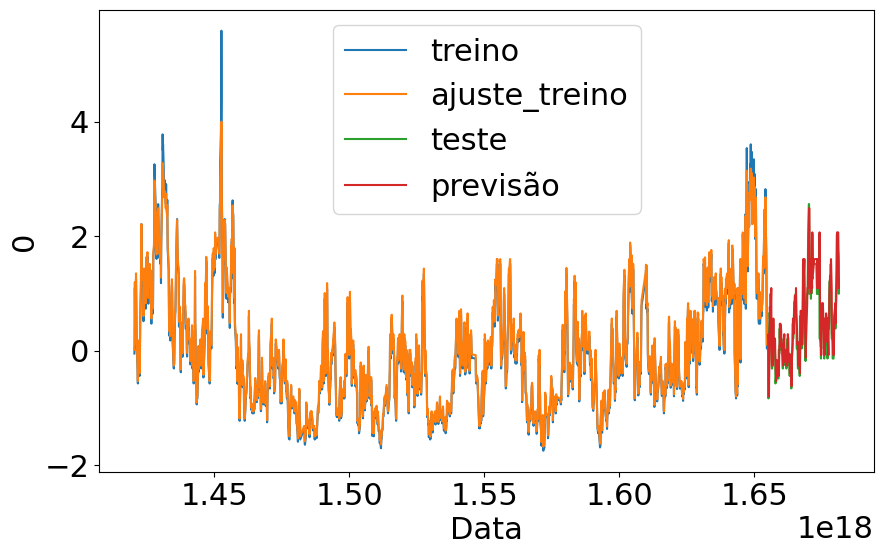

In [51]:
sns.lineplot(x='Data',y=y_treino_novo,data=df_sp_italiano_to_scale[1:treino_split],label='treino')
sns.lineplot(x='Data',y=pd.DataFrame(y_predict_novo)[0],data=df_sp_italiano_to_scale[1:treino_split],label='ajuste_treino')
sns.lineplot(x='Data',y=y_teste_novo,data=df_sp_italiano_to_scale[treino_split:teste_split],label='teste')
sns.lineplot(x='Data',y=resultado.values,data=df_sp_italiano_to_scale[treino_split:teste_split],label='previsão')

In [52]:
x_treino_novo, y_treino_novo = separa_dados(vetor,4)
x_teste_novo, y_teste_novo = separa_dados(vetor2,4)

In [53]:
regressor4 = Sequential()

In [54]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 32        
                                                                 
 dense_8 (Dense)             (None, 64)                512       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [55]:
regressor4.fit(x_treino_novo,y_treino_novo,epochs =300)

Epoch 1/300
57/57 [==============================] - 1s 2ms/step - loss: 1.0148
Epoch 2/300
57/57 [==============================] - 0s 2ms/step - loss: 0.6652
Epoch 3/300
57/57 [==============================] - 0s 2ms/step - loss: 0.2255
Epoch 4/300
57/57 [==============================] - 0s 2ms/step - loss: 0.1972
Epoch 5/300
57/57 [==============================] - 0s 2ms/step - loss: 0.1856
Epoch 6/300
57/57 [==============================] - 0s 2ms/step - loss: 0.1739
Epoch 7/300
57/57 [==============================] - 0s 2ms/step - loss: 0.1620
Epoch 8/300
57/57 [==============================] - 0s 2ms/step - loss: 0.1522
Epoch 9/300
57/57 [==============================] - 0s 2ms/step - loss: 0.1434
Epoch 10/300
57/57 [==============================] - 0s 3ms/step - loss: 0.1368
Epoch 11/300
57/57 [==============================] - 0s 2ms/step - loss: 0.1327
Epoch 12/300
57/57 [==============================] - 0s 1ms/step - loss: 0.1300
Epoch 13/300
57/57 [=================

In [56]:
y_predict_teste_novo = regressor4.predict(x_teste_novo)

7/7 [==============================] - 0s 2ms/step


In [57]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

In [58]:
treino_split = len(y_treino_novo)
teste_split = treino_split + len(y_teste_novo)

<Axes: xlabel='Data', ylabel='0'>

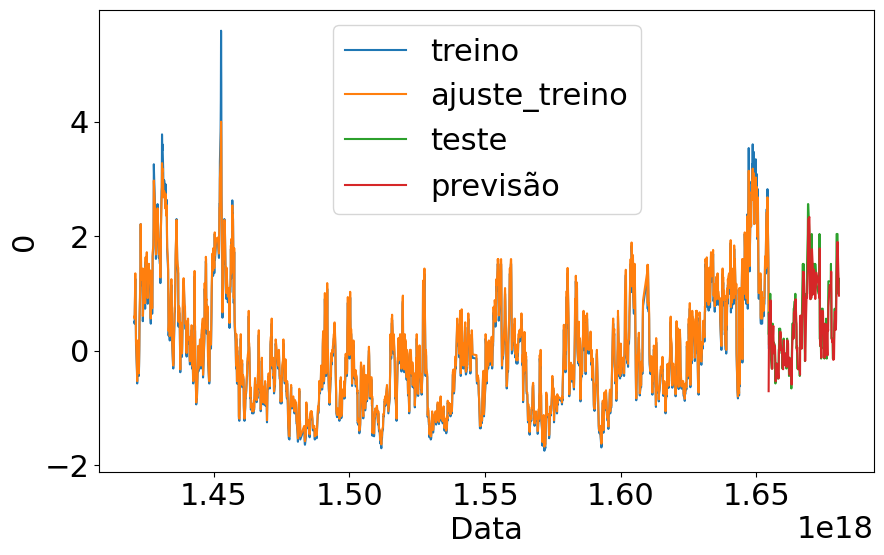

In [59]:
sns.lineplot(x='Data',y=y_treino_novo,data=df_sp_italiano_to_scale[4:treino_split+4],label='treino')
sns.lineplot(x='Data',y=pd.DataFrame(y_predict_novo)[0],data=df_sp_italiano_to_scale[4:treino_split+4],label='ajuste_treino')
sns.lineplot(x='Data',y=y_teste_novo,data=df_sp_italiano_to_scale[treino_split:teste_split],label='teste')
sns.lineplot(x='Data',y=resultado.values,data=df_sp_italiano_to_scale[treino_split:teste_split],label='previsão')
# sns.lineplot(x='Data',y=y_treino_novo,data=df_sp_italiano_to_scale[1:treino_split],label='treino')
# sns.lineplot(x='Data',y=pd.DataFrame(y_predict_novo)[0],data=df_sp_italiano_to_scale[1:treino_split],label='ajuste_treino')
# sns.lineplot(x='Data',y=y_teste_novo,data=df_sp_italiano_to_scale[treino_split:teste_split],label='teste')
# sns.lineplot(x='Data',y=resultado.values,data=df_sp_italiano_to_scale[treino_split:teste_split],label='previsão')

In [107]:
sc2 = StandardScaler()

In [106]:
df_sp_italiano_to_scale = df_sp_italiano[['Preço','Data']]

In [108]:
sc2.fit(df_sp_italiano_to_scale['Preço'].values.reshape(-1,1))

StandardScaler()

In [109]:
y = sc2.transform(df_sp_italiano_to_scale['Preço'].values.reshape(-1,1))

In [110]:
tamanho_treino = int(len(df_sp_italiano_to_scale)*0.9)
tamanho_teste = len(df_sp_italiano_to_scale)-tamanho_treino

In [111]:
y_treino = y[0:tamanho_treino]
y_teste = y[tamanho_treino:len(df_sp_italiano_to_scale)]

<Axes: xlabel='Data'>

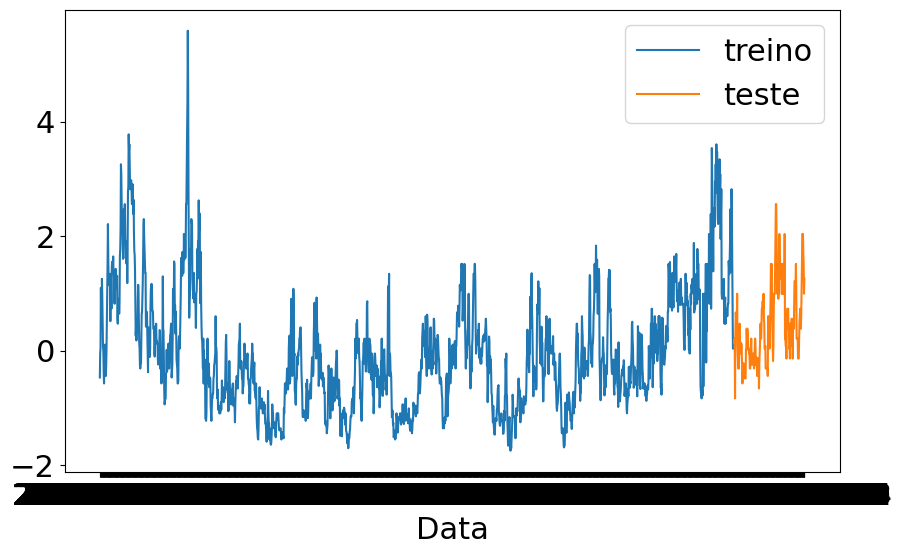

In [113]:
sns.lineplot(x='Data',y=y_treino[:,0],data=df_sp_italiano_to_scale[0:tamanho_treino],label='treino') 
sns.lineplot(x='Data',y=y_teste[:,0], data=df_sp_italiano_to_scale[tamanho_treino:len(df_sp_italiano_to_scale)],label='teste')

In [114]:
vetor = pd.DataFrame(y_treino)[0]

In [115]:
x_treino_novo, y_treino_novo = separa_dados(vetor,10)

In [116]:
vetor2 = pd.DataFrame(y_teste)[0]

In [117]:
x_teste_novo, y_teste_novo = separa_dados(vetor2,10)

In [118]:
x_treino_novo = x_treino_novo.reshape((x_treino_novo.shape[0],x_treino_novo.shape[1],1))

In [119]:
x_teste_novo = x_teste_novo.reshape((x_teste_novo.shape[0],x_teste_novo.shape[1],1))

In [120]:
from tensorflow.keras.layers import LSTM

In [121]:
recorrente = Sequential()

In [122]:
recorrente.add(LSTM(128, input_shape=(x_treino_novo.shape[1],x_treino_novo.shape[2])))
recorrente.add(Dense(units=1))

In [123]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [124]:
resultado = recorrente.fit(x_treino_novo,y_treino_novo,validation_data=(x_teste_novo,y_teste_novo),epochs=100)

Epoch 1/100
56/56 [==============================] - 4s 34ms/step - loss: 0.3288 - val_loss: 0.2294
Epoch 2/100
56/56 [==============================] - 1s 24ms/step - loss: 0.2070 - val_loss: 0.1699
Epoch 3/100
56/56 [==============================] - 1s 14ms/step - loss: 0.1616 - val_loss: 0.1387
Epoch 4/100
56/56 [==============================] - 1s 15ms/step - loss: 0.1341 - val_loss: 0.1240
Epoch 5/100
56/56 [==============================] - 1s 15ms/step - loss: 0.1260 - val_loss: 0.1166
Epoch 6/100
56/56 [==============================] - 1s 15ms/step - loss: 0.1217 - val_loss: 0.1160
Epoch 7/100
56/56 [==============================] - 1s 14ms/step - loss: 0.1211 - val_loss: 0.1129
Epoch 8/100
56/56 [==============================] - 1s 14ms/step - loss: 0.1184 - val_loss: 0.1278
Epoch 9/100
56/56 [==============================] - 1s 15ms/step - loss: 0.1186 - val_loss: 0.1147
Epoch 10/100
56/56 [==============================] - 1s 15ms/step - loss: 0.1185 - val_loss: 0.1130

In [130]:
y_ajustado = recorrente.predict(x_treino_novo)
print(len(y_ajustado))

56/56 [==============================] - 1s 12ms/step
1792


In [131]:
treino_split = len(y_treino_novo)
teste_split = treino_split + len(y_teste_novo)

<Axes: xlabel='Data'>

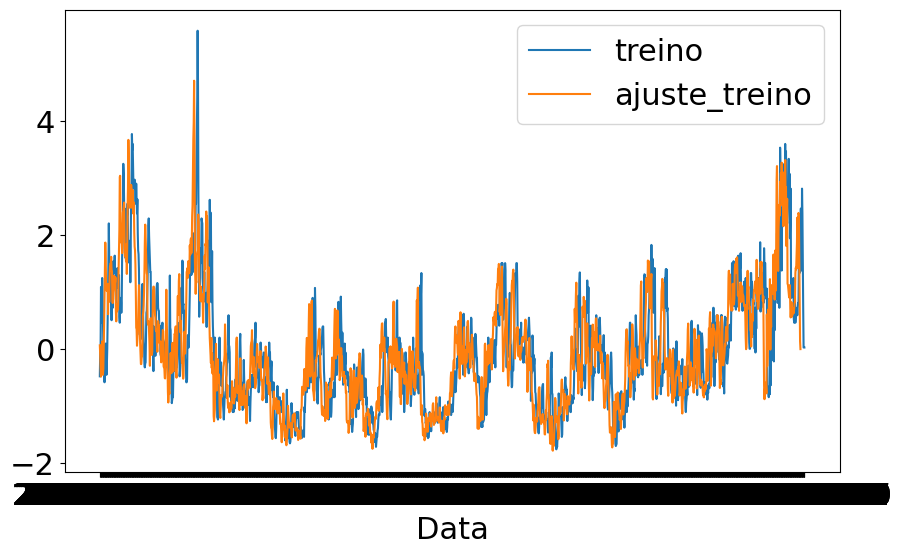

In [133]:
sns.lineplot(x='Data',y=y_treino[:,0],data=df_sp_italiano_to_scale[0:tamanho_treino],label='treino')
sns.lineplot(x='Data',y=y_ajustado[:,0],data=df_sp_italiano_to_scale[0:1792],label='ajuste_treino')

In [134]:
y_predit = recorrente.predict(x_teste_novo)

6/6 [==============================] - 1s 10ms/step


<Axes: xlabel='Data'>

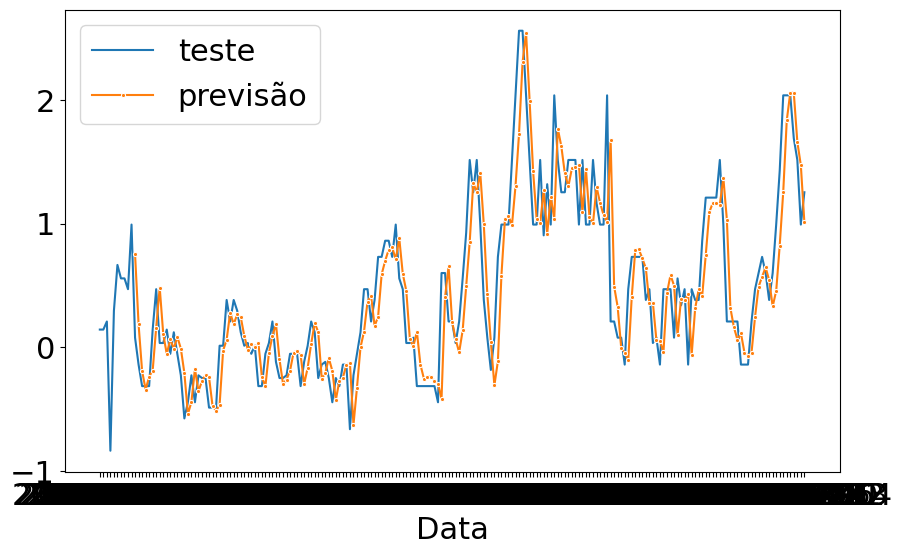

In [135]:
sns.lineplot(x='Data',y=y_teste[:,0], data=df_sp_italiano_to_scale[tamanho_treino:len(df_sp_italiano_to_scale)],label='teste')
sns.lineplot(x='Data',y=y_predit[:,0], data=df_sp_italiano_to_scale[tamanho_treino+10:len(df_sp_italiano_to_scale)],marker='.',label='previsão')

In [136]:
print(resultado.history.keys())

dict_keys(['loss', 'val_loss'])


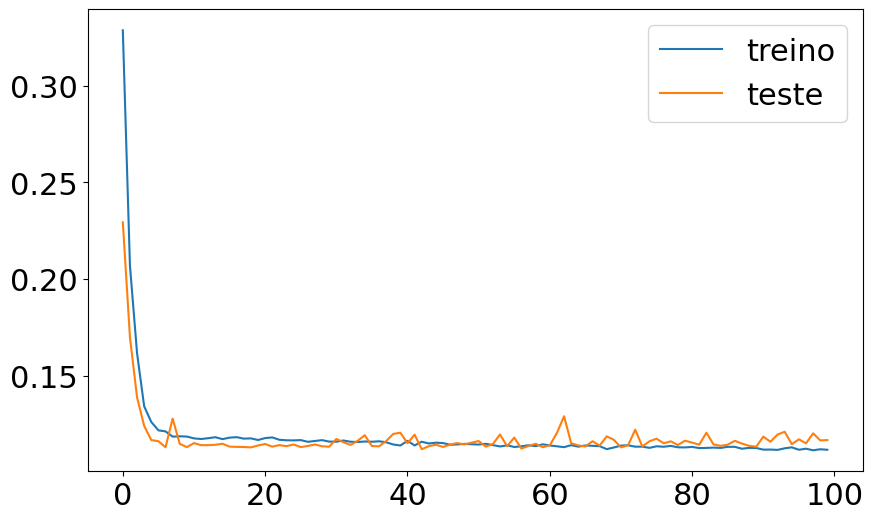

In [140]:
import matplotlib.pyplot as plt
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])